In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
url = "https://raw.githubusercontent.com/Hunteracademic/Unsupervised_assignment_1/master/patient_priority.csv"
df = pd.read_csv(url)
df = df.drop("triage", axis=1)
df.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


In [3]:
print(df.isna().sum()[df.isna().sum() > 0])
patient_priority_clean = df.dropna()

gender    1
dtype: int64


In [4]:
# patient_priority_clean.drop(columns=["Unnamed: 0"], inplace=True)
patient_priority_enc = pd.get_dummies(
    patient_priority_clean,
    columns=["Residence_type", "smoking_status"]
)

patient_priority_clean.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


In [5]:
scaler = MinMaxScaler()
# Fit dataset into new variable using scaler
scaled_x = scaler.fit_transform(patient_priority_enc)
# create dataframe with index and column names
df_scaled = pd.DataFrame(scaled_x, columns=patient_priority_enc.columns)
df_scaled.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,...,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.000000,0.222222,1.0,0.50,0.761905,1.000000,0.53125,0.0,0.367528,0.282051,...,0.153982,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000196,0.388889,0.0,0.75,0.952381,0.208333,0.28125,0.0,0.138171,0.333333,...,0.136283,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000391,0.166667,1.0,0.50,0.666667,1.000000,0.28125,0.0,0.298026,0.410256,...,0.224779,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000587,0.370370,0.0,1.00,0.742857,0.444444,0.28125,1.0,0.117320,0.384615,...,0.136283,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000783,0.481481,1.0,0.75,0.857143,0.312500,0.28125,0.0,0.367528,0.884615,...,0.189381,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [6]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import itertools
import pandas as pd
 
X_use = df_scaled.values  # cleaned + scaled data
 
# Parameter grid
eps_list = [0.60, 0.70, 0.80, 0.90, 1.00, 1.20, 1.40, 1.60, 1.80, 2.00]
min_samples_list = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
metric_list = ["euclidean", "manhattan"]
p_list = [1, 2]  # only used for minkowski
 
results_dbscan = []
 
 
for eps, min_samples, metric in itertools.product(eps_list, min_samples_list, metric_list):
 
    # p only applies to minkowski
    p_values = p_list if metric == "minkowski" else [None]
 
    for p in p_values:
        try:
            model = DBSCAN(
                eps=eps,
                min_samples=min_samples,
                metric=metric,
                p=p
            )
 
            labels = model.fit_predict(X_use)
 
            # Count clusters excluding noise
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
 
            # Only keep configurations with >1 cluster
            if n_clusters < 2:
                continue
 
            sil = silhouette_score(X_use, labels)
 
            results_dbscan.append({
                "model_type": "DBSCAN",
                "eps": eps,
                "min_samples": min_samples,
                "metric": metric,
                "p": p,
                "clusters": n_clusters,
                "silhouette_score": sil,
                "labels": labels  # <-- added labels column
            })
 
        except Exception as e:
            print("Error:", e)
            continue
 
 
dbscan_results_df = pd.DataFrame(results_dbscan)
 
if dbscan_results_df.empty:
    print("\nNo DBSCAN configurations produced more than one cluster.")
else:
    print("\nTop DBSCAN models:")
    cols = ["eps", "min_samples", "metric", "p", "clusters", "silhouette_score"]
    print(dbscan_results_df[cols].sort_values("silhouette_score", ascending=False).head(10))


Top DBSCAN models:
     eps  min_samples     metric     p  clusters  silhouette_score
94   1.2            3  euclidean  None         8          0.331717
92   1.2            2  euclidean  None         8          0.331717
122  1.4           10  euclidean  None         8          0.331717
100  1.2            8  euclidean  None         8          0.331717
112  1.4            2  euclidean  None         8          0.331717
126  1.4           20  euclidean  None         8          0.331717
98   1.2            5  euclidean  None         8          0.331717
120  1.4            8  euclidean  None         8          0.331717
116  1.4            4  euclidean  None         8          0.331717
114  1.4            3  euclidean  None         8          0.331717


In [8]:
eps_values = [0.95, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
min_samples = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
metrics = ["manhattan", "euclidean"]

In [9]:
results = []
models_results = {}
for metric in metrics:
    for eps in eps_values:
        for min_samp in min_samples:
            dbscan = DBSCAN(eps=eps, min_samples=min_samp, metric=metric)
            labels = dbscan.fit_predict(df_scaled)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            if n_clusters > 1:  # Need at least 2 clusters
                try:
                    score = silhouette_score(df_scaled, labels)
                    results.append({
                        'metric': metric,
                        'eps': eps,
                        'min_samples': min_samp,
                        'n_clusters': n_clusters,
                        'noise_pct': n_noise / len(df_scaled) * 100,
                        'silhouette': score
                    })
                    models_results[(metric, eps, min_samp)] = {
                        'n_clusters': n_clusters,
                        'noise_pct': n_noise / len(df_scaled) * 100,
                        'silhouette': score,
                        'labels': labels
                    }
                except:
                    pass



In [10]:
results_df = pd.DataFrame(results).sort_values('silhouette', ascending=False)
results_df

,metric,eps,min_samples,n_clusters,noise_pct,silhouette
168,euclidean,1.30,25,8,0.000000,0.331717
169,euclidean,1.30,30,8,0.000000,0.331717
170,euclidean,1.40,2,8,0.000000,0.331717
179,euclidean,1.40,30,8,0.000000,0.331717
163,euclidean,1.30,5,8,0.000000,0.331717
...,...,...,...,...,...,...
4,manhattan,0.95,8,30,51.343198,-0.153642
17,manhattan,1.00,20,12,73.394627,-0.178061
16,manhattan,1.00,15,19,63.410430,-0.178479
6,manhattan,0.95,15,12,73.250970,-0.183423


In [13]:
results_df.sort_values(by='silhouette', ascending=False)
filter_df = results_df[(results_df['silhouette'] > 0.1) & ((results_df['n_clusters'] > 2) & (results_df['n_clusters'] < 10))]
filter_df = filter_df.sort_values(by='silhouette', ascending=False)
filter_df


,metric,eps,min_samples,n_clusters,noise_pct,silhouette
168,euclidean,1.3,25,8,0.000000,0.331717
169,euclidean,1.3,30,8,0.000000,0.331717
170,euclidean,1.4,2,8,0.000000,0.331717
179,euclidean,1.4,30,8,0.000000,0.331717
163,euclidean,1.3,5,8,0.000000,0.331717
...,...,...,...,...,...,...
89,manhattan,1.7,30,8,8.231576,0.301292
86,manhattan,1.7,15,9,6.249102,0.296579
79,manhattan,1.6,30,8,9.768711,0.294585
78,manhattan,1.6,25,9,9.150984,0.273926


In [ ]:

ncols = 3  # more columns, smaller plots
nrows = int(np.ceil(len(filter_df) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * 4, nrows * 3)
)
axes = np.array(axes).reshape(-1)

last_idx = -1
for idx, row in enumerate(filter_df.itertuples(index=False)):
    df_scaled["cluster"] = models_results[(row.metric, row.eps, row.min_samples)]["labels"]
    sns.countplot(data=df_scaled, x="cluster", ax=axes[idx])
    axes[idx].set_title(f"{row.metric} | eps={row.eps} | min_samples={row.min_samples}")
    last_idx = idx

# hide unused axes if the grid is larger than the data
for j in range(last_idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()

Noise percentage: 0.00%


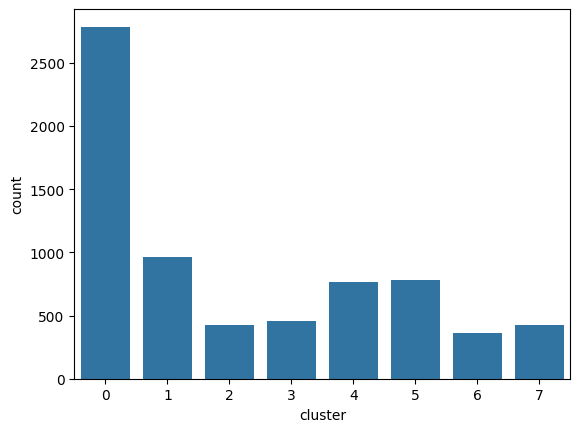

In [14]:
# Testing one model
from sklearn.cluster import DBSCAN
metric = 'euclidean'
eps_test = 1.3
min_samp_test = 25
df_scaled_test = df_scaled.copy()

dbscan_test = DBSCAN(eps=eps_test, min_samples=min_samp_test, metric=metric)
labels_test = dbscan_test.fit_predict(df_scaled_test)

# Calculate silhouette BEFORE adding cluster column
# sil_test = silhouette_score(df_scaled_test, labels_test)

# NOW add the cluster column for plotting
df_scaled_test["cluster"] = labels_test
sns.countplot(data=df_scaled_test, x="cluster")

#print(f"Silhouette Score: {sil_test:.4f}")
print(f'Noise percentage: {list(labels_test).count(-1) / len(df_scaled_test) * 100:.2f}%')

IndexError: index 20 is out of bounds for axis 0 with size 20

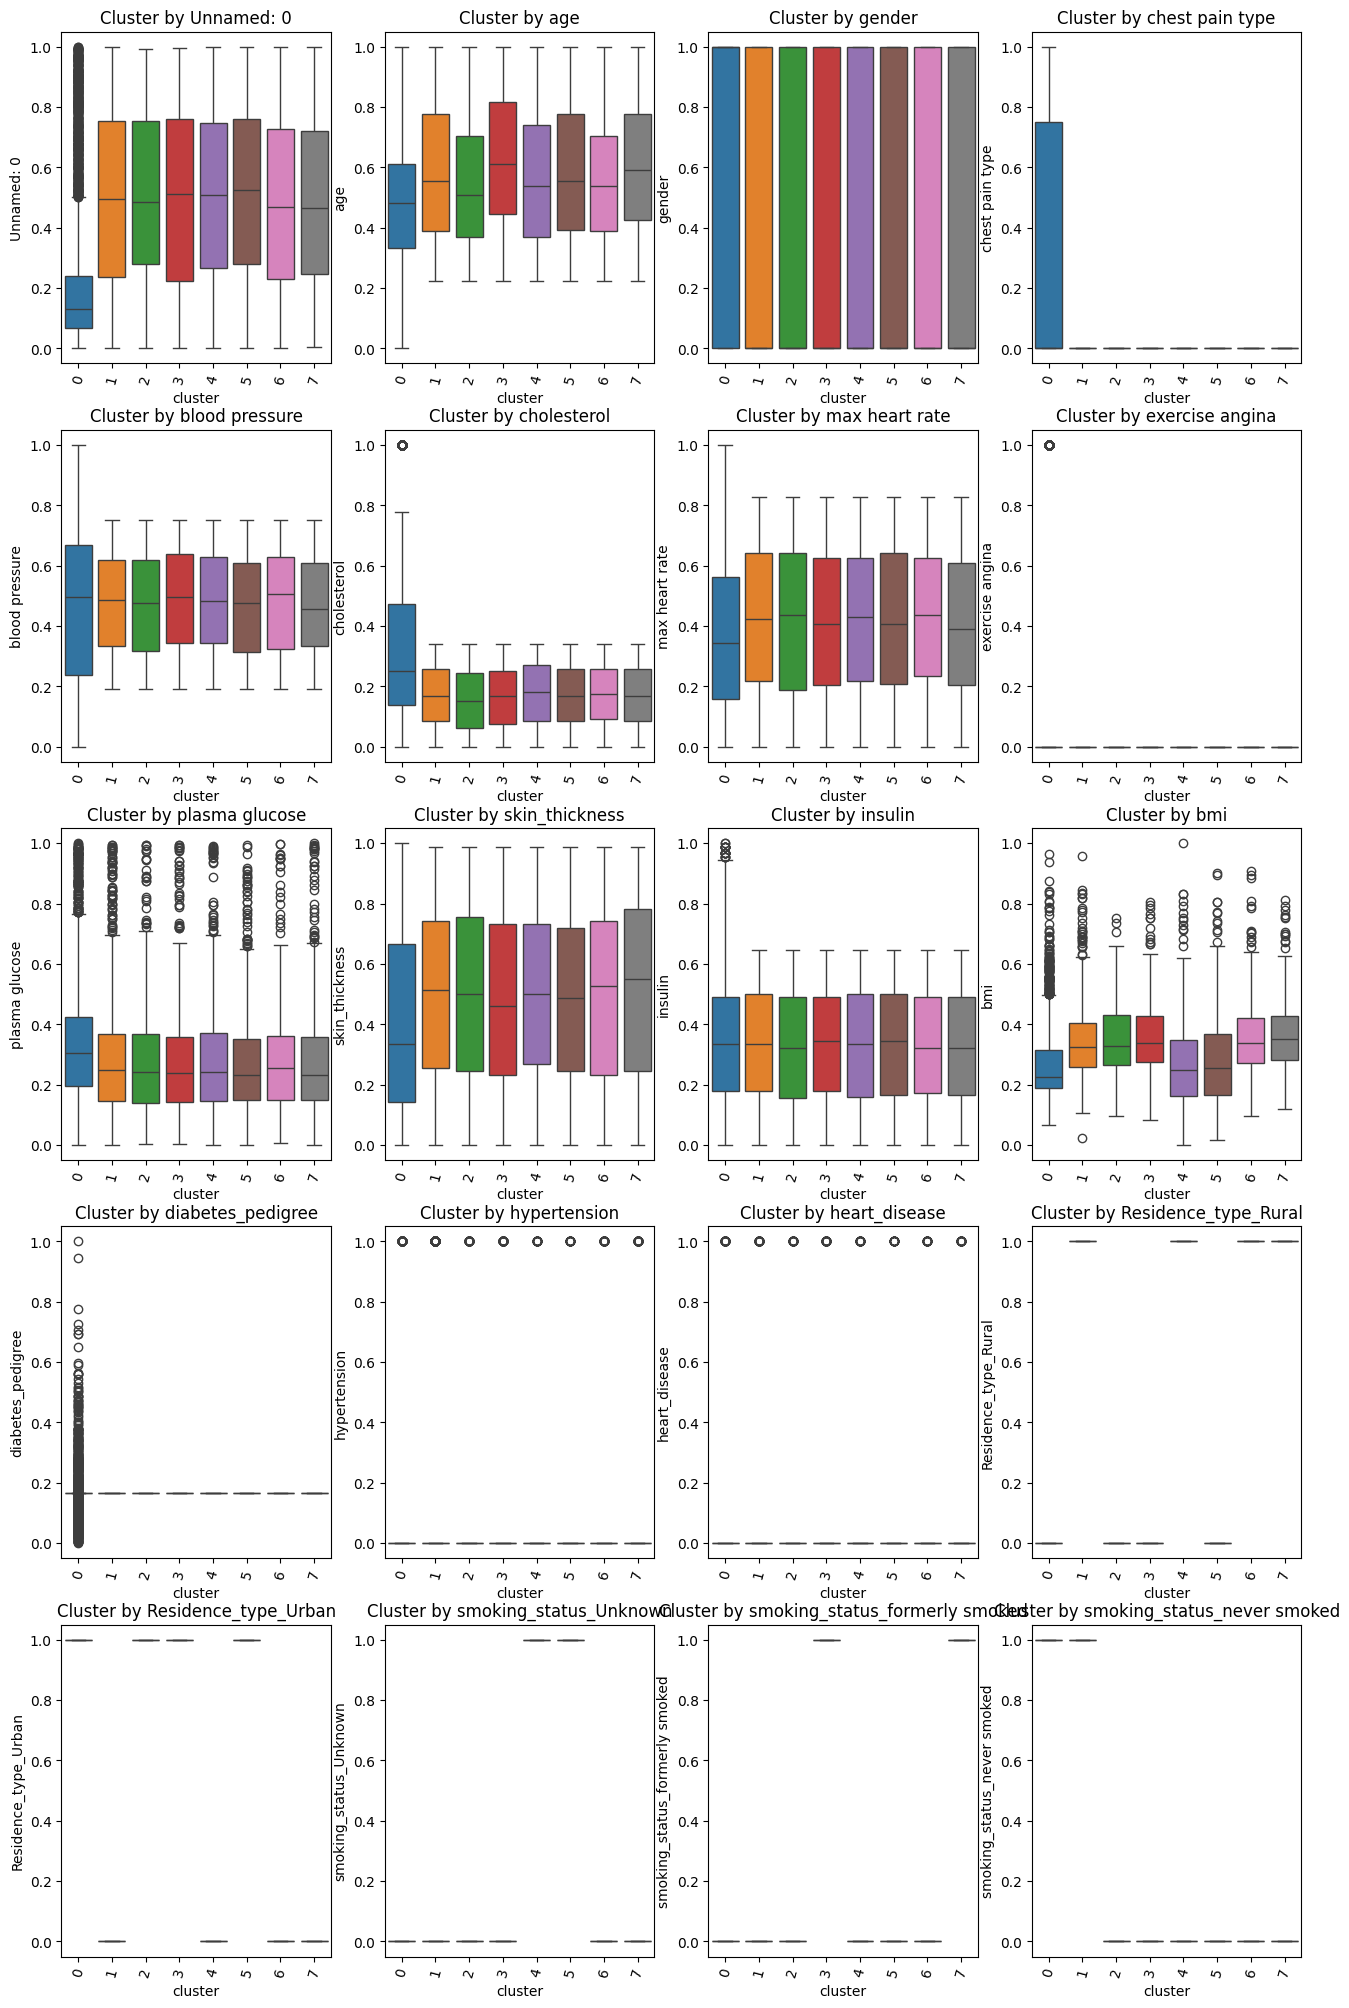

In [16]:
features = df_scaled_test.columns.tolist()
features.remove('cluster')
# For removing noise
df_scaled_no_noise = df_scaled_test[df_scaled_test['cluster']!=-1]

_, axes = plt.subplots(5, 4, figsize=(16, 25))
axes = axes.flatten()
for idx, feature in enumerate(features):
    sns.boxplot(data=df_scaled_no_noise, x='cluster', y=feature, hue='cluster', palette='tab10', ax=axes[idx], legend=False)
    axes[idx].set_title(f"Cluster by {feature}")
    axes[idx].tick_params(axis='x', labelrotation=75)
plt.tight_layout()
plt.show()